In [1]:
"""
Pyjnu-Py_Comparison_C.ipynb
Authors:
    -Stephan Meighen-Berger
Used to compare the python results to the more precise C results
"""

'\nPyjnu-Py_Comparison_C.ipynb\nAuthors:\n    -Stephan Meighen-Berger\nUsed to compare the python results to the more precise C results\n'

In [2]:
"""
imports external
"""
import sys
#sys.path.append("C:/Users/steph/Documents/PhD/Pyjnu-ECP/py_core/")
sys.path.append("C:/Users/steph/OneDrive/University TUM/PhD/Repositories/Pyjnu-ECP/py_core/")
import logging
import matplotlib.pyplot as plt
import csv as csv
import numpy as np

In [3]:
from pyjnu import PyRun
from constants import phys_const

In [4]:
logging.basicConfig(level=logging.INFO)

In [5]:
PYJNU = PyRun(
    Bfield=0.088,
    delta=230.,
    R=0.19e15,
    d=540.,
    z=0.116,
    node_number=None
)

INFO:__builtin__.instance:Initializing the class...
INFO:__builtin__.instance:Setting user defined variables..
INFO:__builtin__.instance:Finished setting the variables.
INFO:__builtin__.instance:Creating the particle instances...
INFO:__builtin__.instance:Creating particle 11
INFO:__builtin__.instance:Finished particle 11
INFO:__builtin__.instance:Creating particle 22
INFO:__builtin__.instance:Finished particle 22
INFO:__builtin__.instance:Creating particle 22_local
INFO:__builtin__.instance:Finished particle 22_local
INFO:__builtin__.instance:Finished particle creation
INFO:__builtin__.instance:Loading the rates...
INFO:__builtin__.instance:Finished loading
INFO:__builtin__.instance:Finished initialization


In [6]:
PYJNU.solve_steady()

INFO:__builtin__.instance:Starting steady state solving...
INFO:__builtin__.instance:Setting the geometry...
INFO:__builtin__.instance:Creating the geometry object...
INFO:__builtin__.instance:Finished creating the geometry object...
INFO:__builtin__.instance:Geometry set
INFO:__builtin__.instance:The initial electron spectrum...
INFO:__builtin__.instance:Set the initial spectrum
INFO:__builtin__.instance:Synchrotron...
INFO:__builtin__.instance:Inverse Compton...
INFO:__builtin__.instance:Case B
INFO:__builtin__.instance:Storing results...
INFO:__builtin__.instance:Finished steady state solving...
INFO:__builtin__.instance:Results stored in particle fluxes...


In [7]:
e_grid = PYJNU.particles['22'].e_grid
flux_22_0 = PYJNU.particles['22'].flux['0']
flux_22_2 = PYJNU.particles['22'].flux['2']

[]

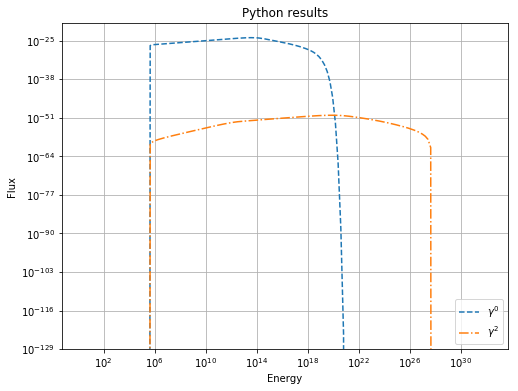

In [8]:
figure  = plt.figure(figsize=(8, 6))
plt.plot(e_grid, flux_22_0, ls='--', label=r'$\gamma^0$')
plt.plot(e_grid, flux_22_2, ls='-.', label=r'$\gamma^2$')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Python results')
plt.xlabel('Energy')
plt.ylabel('Flux')
plt.loglog()

In [9]:
#Importing Dermer results
tmp = []
with open('../../core/Dermer_paper_a.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        tmp.append(row)
tmp = [[float(row[col]) for col in range(0, len(row))] for row in tmp]
tmp = np.asarray(tmp)

In [10]:
e_grid_C = tmp[:, 0]
flux_22_0_C = tmp[:, 1]
flux_22_2_C = tmp[:, 2]

In [11]:
phys_const['mec2']

8.1871111680068e-07

In [12]:
phys_const['h']

6.6260755e-27

[]

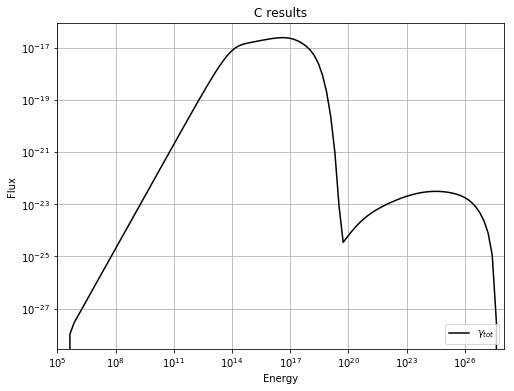

In [13]:
figure  = plt.figure(figsize=(8, 6))
flux1 = flux_22_0_C * e_grid_C
flux2 = flux_22_2_C * e_grid_C * phys_const['mec2'] / phys_const['h']
total = flux1 + flux2
#plt.plot(e_grid_C,
#         flux1,
#         ls='--', label=r'$\gamma^0$')
#plt.plot(e_grid_C,
#         flux2,
#         ls='-.', label=r'$\gamma^2$')
plt.plot(e_grid_C,
         total,
         label=r'$\gamma_{tot}$', color='k')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('C results')
plt.xlabel('Energy')
plt.ylabel('Flux')
plt.xlim(1e5, 1e28)
plt.loglog()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


[]

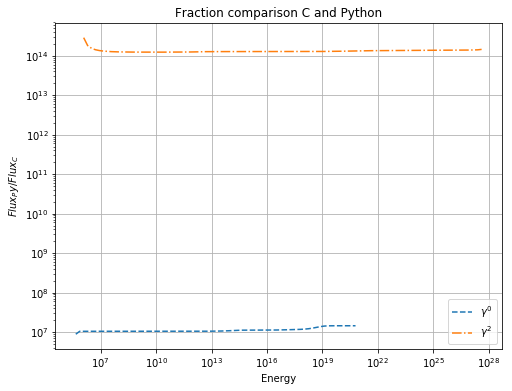

In [14]:
figure  = plt.figure(figsize=(8, 6))
plt.plot(e_grid, flux_22_0 / flux_22_0_C, ls='--', label=r'$\gamma^0$')
plt.plot(e_grid, flux_22_2 / flux_22_2_C, ls='-.', label=r'$\gamma^2$')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Fraction comparison C and Python')
plt.ylabel('$Flux_Py / Flux_C$')
plt.xlabel('Energy')
plt.loglog()